# Distributions

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from thinkstats import decorate

<IPython.core.display.Javascript object>

## Histograms

One of the best ways to describe a variable is to report the quantities it contains and how many times each one appears.
This description is called the **distribution** of the variable.

A common representation of a distribution is a **histogram**, which is a graph that shows the **frequency** of each quantity, which is the number of times it appears.

To represent distributions, we'll use a library called `empiricaldist`.
In this context, "empirical" means that the distributions are based on data rather than mathematical models.

`empiricaldist` provides a class called `Hist` we can use to compute and plot a histogram.
We can import it like this.

In [4]:
from empiricaldist import Hist

<IPython.core.display.Javascript object>

To show how it works, we'll start with a small list of values.

In [5]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]

<IPython.core.display.Javascript object>

`Hist` provides a method called `from_seq` that takes a sequence and makes a `Hist` object.

In [6]:
hist = Hist.from_seq(t)
hist

,freqs
1.0,1
2.0,2
3.0,1
5.0,1


<IPython.core.display.Javascript object>

A `Hist` object is a kind of Pandas `Series` that contains quantities and their frequencies.
In this example, the quantity `1.0` corresponds to frequency 1, the quantity `2.0` corresponds to frequency 2, etc.

`Hist` provides a method called `bar` that plots the histogram as a bar chart.

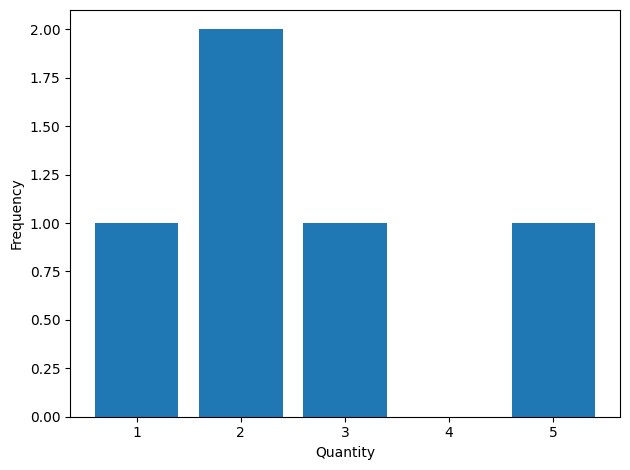

<IPython.core.display.Javascript object>

In [7]:
hist.bar()
decorate(xlabel="Quantity", ylabel="Frequency")

Because a `Hist` is a Pandas `Series`, we can use the bracket operator to look up a quantity and get its frequency. 

In [8]:
hist[2.0]

2

<IPython.core.display.Javascript object>

But unlike a Pandas `Series`, we can also call a `Hist` object like a function to look up a quantity.

In [9]:
hist(2.0)

2

<IPython.core.display.Javascript object>

If we look up a quantity that does not appear in the `Hist`, the function syntax returns `0`.

In [10]:
hist(4.0)

0

<IPython.core.display.Javascript object>

A `Hist` object has an attribute called `qs` that returns an array of quantities.

In [11]:
hist.qs

array([1., 2., 3., 5.])

<IPython.core.display.Javascript object>

And an attribute called `ps` that returns an array of frequencies.

In [12]:
hist.ps

array([1, 2, 1, 1])

<IPython.core.display.Javascript object>

We can use `items` to loop through quantity-frequency pairs:

In [13]:
for x, freq in hist.items():
    print(x, freq)

1.0 1
2.0 2
3.0 1
5.0 1


<IPython.core.display.Javascript object>

We'll see more methods as we go along.

## NSFG Distributions

When you start working with a new dataset, I suggest you explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.

As an example, let's look at the NSFG data.
The code we used to clean and validate this data is in a module called `nsfg.py`

In [14]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

<IPython.core.display.Javascript object>

We can import it and read the pregnancy file like this.

In [15]:
from nsfg import read_fem_preg

preg = read_fem_preg()

<IPython.core.display.Javascript object>

For the examples in this chapter, we'll focus on pregnancies that ended in live birth.
We can use the `query` method to select the rows where `outcome` is 1.

In [16]:
live = preg.query("outcome == 1")

<IPython.core.display.Javascript object>

We can use `Hist.from_seq` to count the number of times each quantity appears in `birthwgt_lb`, which is the pounds part of the birth weights.

In [126]:
hist = Hist.from_seq(live["birthwgt_lb"], name="birthwgt_lb")

<IPython.core.display.Javascript object>

Here's what the distribution looks like.

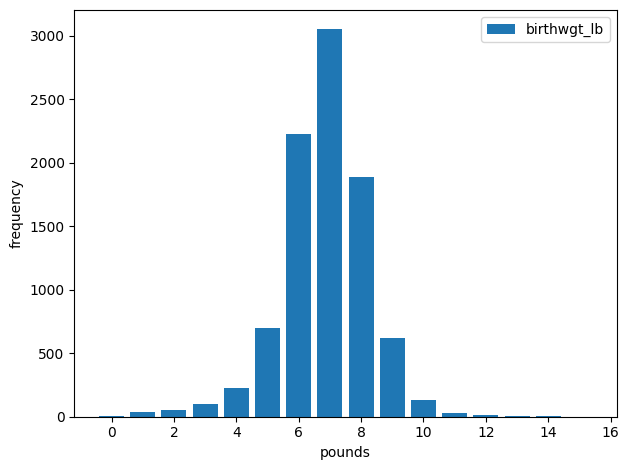

<IPython.core.display.Javascript object>

In [127]:
hist.bar()
decorate(xlabel="pounds", ylabel="frequency")

Looking at a distribution like this, the first thing we notice is the shape, which resembles the famous bell curve, more formally called a normal distribution or a Gaussian distribution.
But unlike a normal distribution, it is not symmetric -- the tail extends farther left than right.
A distribution with this shape is said to be **skewed** to the left.

The other notable feature of the distribution is the **mode**, which is the most common value.
To find the mode, we can use the method `idxmax`, which find the quantity associated with the highest frequency.

In [128]:
hist.idxmax()

7.0

<IPython.core.display.Javascript object>

`Hist` provides a method called `mode` that does the same thing.

In [129]:
hist.mode()

7.0

<IPython.core.display.Javascript object>

In this distribution, the mode is at 7 pounds.

As another example, here's the histogram of `birthwgt_oz`, which is the ounces part of birth weight.

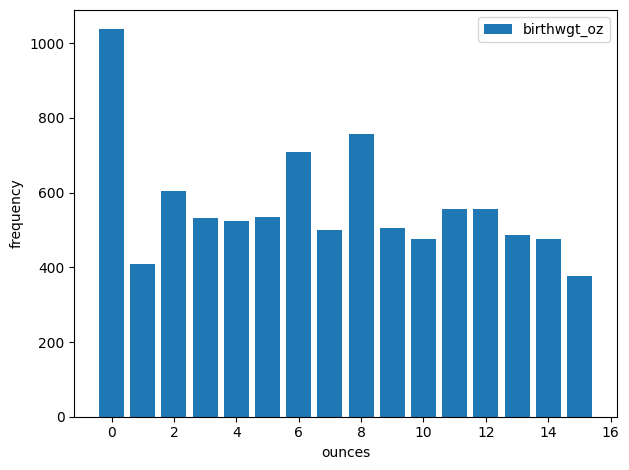

<IPython.core.display.Javascript object>

In [19]:
hist = Hist.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
hist.bar()
decorate(xlabel="ounces", ylabel="frequency")

In theory we expect this distribution to be **uniform** -- that is, all quantities should have the same frequency.
In fact, 0 is more common than the other quantities, and 1 and 15 are less common, probably because respondents round off birth weights that are close to a whole number of pounds.

As another example, let's look at the histogram of `agepreg`, which is the mother's age at the end of pregnancy.

In [ ]:
hist = Hist.from_seq(live["agepreg"], name="agepreg")

In the NSFG, age is reported in centiyears, so there are more unique values than in the other distributions we've looked at.
For that reason, we'll pass `width=0.1` as a keyword argument to the `bar` method, which adjusts the width of the bars so they don't overlap too much.

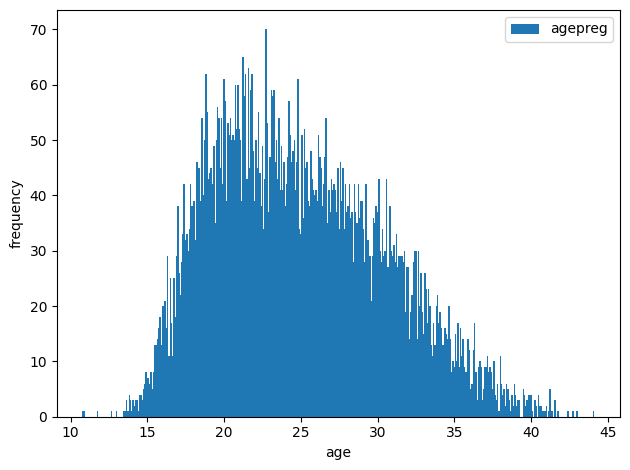

<IPython.core.display.Javascript object>

In [52]:
hist.bar(width=0.1)
decorate(xlabel="age", ylabel="frequency")

The peak of the distribution is between ages 20 and 25, but there is no clear mode at a specific age.
The distribution is very roughly bell-shaped, but it is skewed to the right -- that is, the tail extends farther right than left.

Finally, let's look at the histogram of `prglngth`, which is the length of the pregnancy in weeks.
The `xlim` argument sets the limit of the x-axis to the range from 20 to 50 weeks -- there are few values outside this range, and they are probably errors.

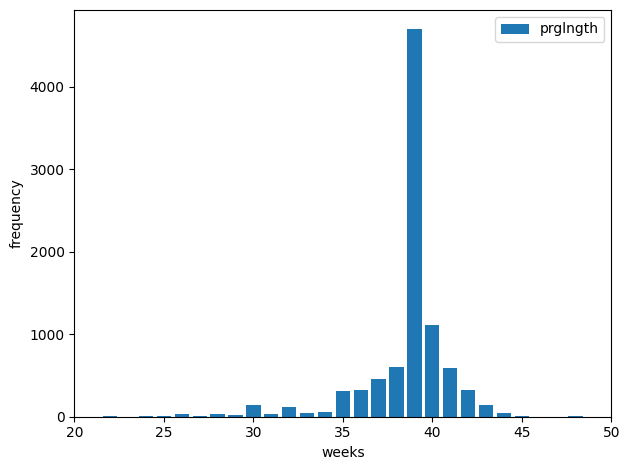

<IPython.core.display.Javascript object>

In [53]:
hist = Hist.from_seq(live["prglngth"], name="prglngth")
hist.bar()
decorate(xlabel="weeks", ylabel="frequency", xlim=[20, 50])

By far the most common quantity is 39 weeks.
The left tail is longer than the right -- early babies are common, but pregnancies seldom go past 43 weeks, and doctors often intervene if they do.

## Outliers

Looking at histograms, it is easy to identify the shape of the distribution and the most common quantities, but rare quantities are not always visible.
Before going on, it is a good idea to check for **outliers**, which are extreme quantities that might be errors in measurement and recording, or might be accurate reports of rare events.

To identify outliers, the following function takes a `Hist` object and an integer `n`, and uses a slice index to select the `n` smallest quantities and their frequencies.

In [54]:
def smallest(hist, n=10):
    return hist[:n]

<IPython.core.display.Javascript object>

In the histogram of `prglngth`, here are the 10 smallest values.

In [24]:
smallest(hist)

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

<IPython.core.display.Javascript object>

Since we selected the rows for live births, pregnancy lengths less than 10 weeks are certainly errors.
The most likely explanation is that the outcome was not coded correctly.
Lengths higher than 30 weeks are probably legitimate.
Between 10 and 30 weeks, it is hard to be sure -- some quantities are probably errors, but some correctly record preterm births.

The following function selects the largest values from a `Hist` object.

In [25]:
def largest(hist, n=10):
    return hist[-n:]

<IPython.core.display.Javascript object>

Here are the longest pregnancy lengths in the dataset.

In [26]:
largest(hist)

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

<IPython.core.display.Javascript object>

Some of these values are probably errors.
Most doctors recommend induced labor if a pregnancy exceeds 41 weeks, so 50 weeks seems unlikely to be correct.
But there is no clear line between values that are certainly errors and values that might be correct reports of rare events.

The best way to handle outliers depends on "domain knowledge" -- that is, information about where the data come from and what they mean.
And it depends on what analysis you are planning to perform.

In this example, the motivating question is whether first babies tend to be earlier or later than other babies.
So we'll try to use statistics that will not be thrown off too much by errors.

## First Babies

Now we can compare the distribution of pregnancy lengths for first babies and others.
We can use the `query` method to select rows that represent first babies and others.

In [27]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

<IPython.core.display.Javascript object>

And make a `Hist` of pregnancy lengths for each group.

In [65]:
first_hist = Hist.from_seq(firsts["prglngth"], name="firsts")
other_hist = Hist.from_seq(others["prglngth"], name="others")

<IPython.core.display.Javascript object>

The following function plots two histograms side-by-side.

In [66]:
def two_bar_plots(hist1, hist2, width=0.45, **options):
    """Makes two back-to-back bar plots.

    hist1: Hist object
    hist2: Hist object
    width: width of the bars
    options: passed along to plt.bar
    """
    hist1.bar(align="edge", width=-width, **options)
    hist2.bar(align="edge", width=width, **options)

<IPython.core.display.Javascript object>

Here's what they look like.

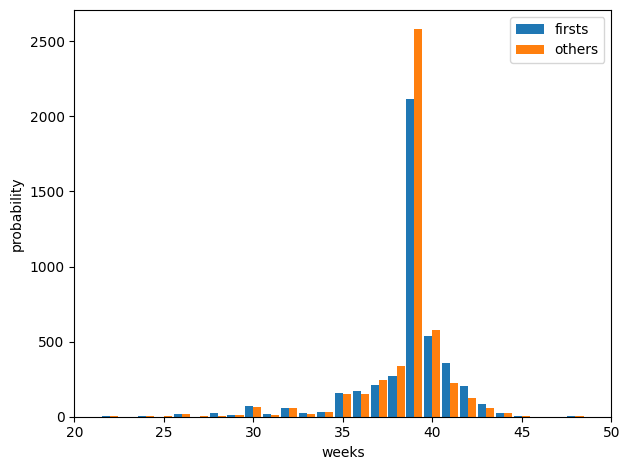

<IPython.core.display.Javascript object>

In [67]:
two_bar_plots(first_hist, other_hist)
decorate(xlabel="weeks", ylabel="probability", xlim=[20, 50])

There is no obvious difference in the shape of the distributions or in the outliers.
It looks like more of the non-first babies are born during week 39, but there are more non-first babies in the dataset, so we should not compare the counts directly.

In [64]:
firsts["prglngth"].count(), others["prglngth"].count()

(4413, 4735)

<IPython.core.display.Javascript object>

Comparing the means of the distributions, it looks like first babies are a little bit later on average.

In [69]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(38.60095173351461, 38.52291446673706)

<IPython.core.display.Javascript object>

But the difference is only 0.078 weeks, which is about 13 hours.

In [72]:
diff = first_mean - other_mean
diff

0.07803726677754952

<IPython.core.display.Javascript object>

In [73]:
diff * 7 * 24

13.11026081862832

<IPython.core.display.Javascript object>

Now, there are three possible implications of this apparent difference:

* There might be a consistent difference in pregnancy length between first babies and others.

* The apparent difference we see in this dataset might be the result of some other difference between first babies and others.

* The apparent difference might be the result of random variation between the two groups.

In later chapters, we will consider these possible explanations more carefully, but for now we will take this result at face value: in this dataset, there is a small difference in pregnancy length between these groups.

## Effect Size

A difference like this is sometimes called an "effect".
There are several ways to quantify the magnitude of an effect.
The simplest is to report the difference in absolute terms -- in this example, the difference is 0.78 weeks.

Another is to report the difference in relative terms.
For example, we might say that first pregnancies are 0.2% longer than others, on average.

In [74]:
diff / other_mean * 100

0.20257363145493953

<IPython.core.display.Javascript object>

One other option is a **standardized** effect size which is a statistic intended to quantify the size of an effect in a way that is comparable between different quantities and different groups.

Standardizing means we express the difference as a multiple of the standard deviation.
So we might be tempted to write something like this.

In [98]:
diff / live["prglngth"].std()

0.028877623375210403

<IPython.core.display.Javascript object>

But notice that we used both groups to compute the standard deviation.
If the groups are substantially different, the standard deviation when we put them together is larger than in either group, which might make the effect size seem small.

An alternative is to use the standard deviation of just one group, but it's not clear which. So the next idea might be to take the average of the two standard deviations, but if the groups are different sizes, that might give more weight to one group than it should get.

One solution is to use **pooled standard deviation**, which is the square root of pooled variance, which is the weighted sum of the variances in the groups.
To compute it, we'll start with the variances.

In [101]:
group1, group2 = firsts["prglngth"], others["prglngth"]

<IPython.core.display.Javascript object>

In [105]:
v1, v2 = group1.var(), group2.var()

<IPython.core.display.Javascript object>

And here is the weighted sum, with the group sizes as weights.

In [106]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

<IPython.core.display.Javascript object>

Finally, here is the pooled standard deviation.

In [107]:
np.sqrt(pooled_var)

2.7022108144953862

<IPython.core.display.Javascript object>

The pooled standard deviation is between the standard deviations of the groups.

In [108]:
firsts["prglngth"].std(), others["prglngth"].std()

(2.7919014146687204, 2.6158523504392375)

<IPython.core.display.Javascript object>

A standardized effect size that uses pooled standard deviation is called Cohen's effect size. Here's a function that computes it.

In [99]:
def cohen_effect_size(group1, group2):
    """Computes Cohen's effect size for two groups.

    group1: Series
    group2: Series

    returns: float
    """
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

<IPython.core.display.Javascript object>

And here's the effect size for the difference in mean pregnancy lengths.

In [109]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])

0.028879044654449834

<IPython.core.display.Javascript object>

In this example, the difference is 0.029 standard deviations, which is small.
To put that in perspective, the difference in height between men and women is about 1.7 standard deviations.

## Reporting results

We have seen several ways to describe the difference in pregnancy length (if there is one) between first babies and others.
How should we report these results?

The answer depends on who is asking the question.
A scientist might be interested in any (real) effect, no matter how small.
A doctor might only care about effects that are **clinically significant** -- that is, differences that affect treatment decisions.
A pregnant woman might be interested in results that are relevant to her, like the probability of delivering early or late.

How you report results also depends on your goals.
If you are trying to demonstrate the importance of an effect, you might choose summary statistics that emphasize differences.
If you are trying to reassure a patient, you might choose statistics that put the differences in context.

Of course your decisions should also be guided by professional ethics.
It's OK to be persuasive -- you *should* design statistical reports and visualizations that tell a story clearly.
But you should also do your best to make your reports honest, and to acknowledge uncertainty and limitations.

## Glossary

-   **distribution**: The quantities that appear in a sample and the frequency of each.

-   **histogram**: A mapping from quantities to frequencies, or a graph that shows this mapping.

-   **frequency**: The number of times a quantity appears in a sample.

-   **mode**: The most frequent quantity in a sample, or one of the most frequent quantities.

-   **normal distribution**: An idealization of a bell-shaped distribution; also known as a Gaussian distribution.

-   **uniform distribution**: A distribution in which all quantities have the same frequency.

-   **tail**: The part of a distribution at the high and low extremes.

-   **central tendency**: A characteristic of a sample or population; intuitively, it is an average or typical quantity.

-   **outlier**: A quantity far from the central tendency.

-   **spread**: A measure of how spread out the quantities in a distribution are.

-   **summary statistic**: A statistic that quantifies some aspect of a distribution, like central tendency or spread.

-   **variance**: A summary statistic often used to quantify spread.

-   **standard deviation**: The square root of variance, also used as a measure of spread.

-   **effect size**: A summary statistic intended to quantify the size of an effect like a difference between groups.

-   **clinically significant**: A result, like a difference between groups, that is relevant in practice.

## Exercises

For the exercises in this chapter, we'll load the NSFG respondent file, which contains one row for each respondent.

In [35]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

<IPython.core.display.Javascript object>

The codebook for this dataset is at <https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf>.

The `nsfg.py` module provides a function that reads the respondent file and returns a `DataFrame`.

In [117]:
from nsfg import read_fem_resp

resp = read_fem_resp()
resp.shape

(7643, 3092)

<IPython.core.display.Javascript object>

This `DataFrame` contains 3092 columns, but we'll use just a few of them.

We'll start with `totincr`, which records the total income for the respondent's family, encoded with a value from 1 to 14.
You can read the codebook to see what income level each value represents.

Make a `Hist` object to represent the distribution of this variable and plot it as a bar chart.

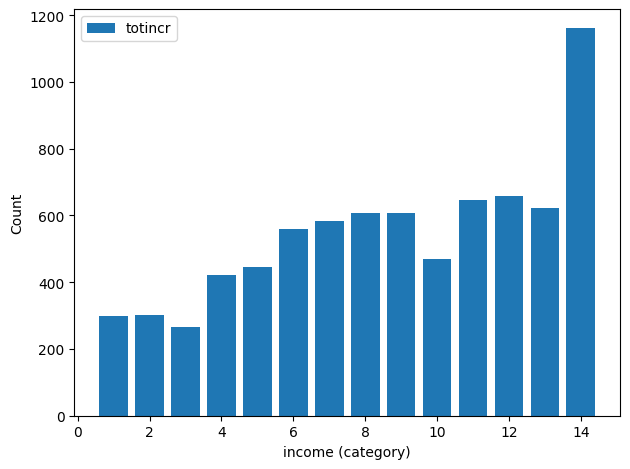

<IPython.core.display.Javascript object>

**Exercise:** Make a histogram of the `parity` column, which records the number of children each respondent has borne.
How would you describe this distribution?

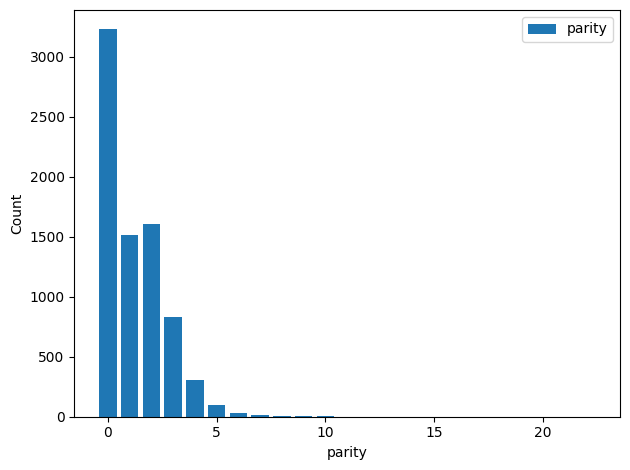

<IPython.core.display.Javascript object>

In [119]:
# The distribution is skewed to the right.

<IPython.core.display.Javascript object>

Use the `largest` function to find the largest values of `parity`.
Are there any values you think are errors?

parity
3     828
4     309
5      95
6      29
7      15
8       8
9       2
10      3
16      1
22      1
Name: parity, dtype: int64

<IPython.core.display.Javascript object>

**Exercise:** Let's investigate whether people with higher income bear more children.

Use the query method to select the respondents with the highest income (level 14).
Plot the histogram of `parity` for just the high income respondents.

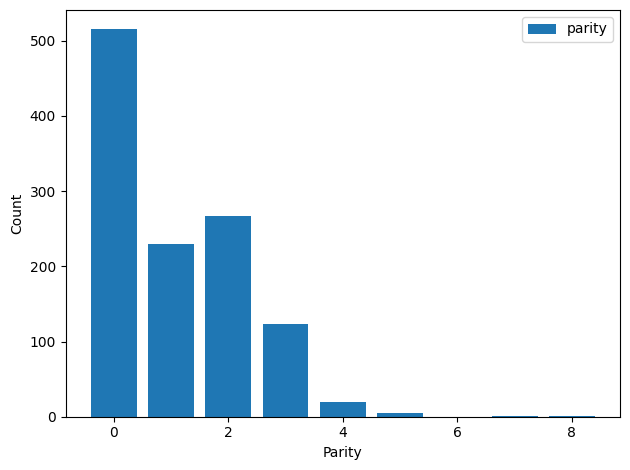

<IPython.core.display.Javascript object>

Compare the mean `parity` for high income respondents and others.

(1.0758620689655172, 1.2495758136665125)

<IPython.core.display.Javascript object>

Compute the Cohen effect size for this difference.
How does it compare with the difference in pregnancy length for first babies and others?

-0.12511855314660367

<IPython.core.display.Javascript object>

Do these results show that people with higher income have more children, or can you think of another explanation for the apparent difference?

In [125]:
# The NSFG inteviews respondents at a range of ages.
# The older respondents are likely to have higher incomes,
# and also more likely to have borne more children.

# To check whether people with higher income have more
# children, we need to compare people at the same ages.

<IPython.core.display.Javascript object>